In [1]:
import sys
sys.path.append("..")
from afl_plots.pitch import AFLPitch

import matplotlib.patheffects as path_effects
import numpy as np

%load_ext autoreload
%autoreload 2

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


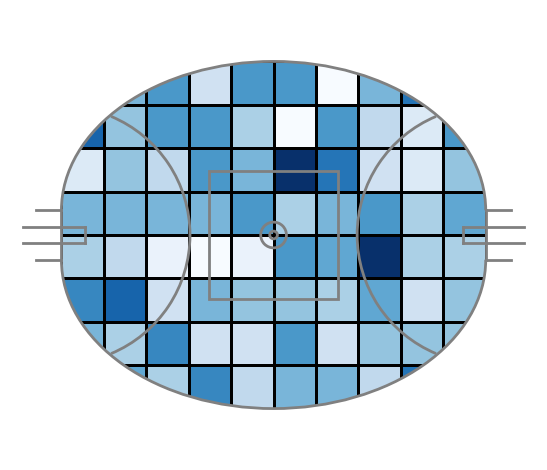

In [2]:
pitch = AFLPitch(pitch_width=135, pitch_length=165, line_zorder=2, line_colour="grey", pitch_colour='black')
fig, ax = pitch.draw()
x = np.random.uniform(low=-165/2, high=165/2, size=1000)
y= np.random.uniform(low=-135/2, high=135/2, size=1000)
stats = pitch.bin_statistic(x, y, bins=(10, 8))
pitch.heatmap(stats, edgecolors="black", cmap="Blues", ax=ax)

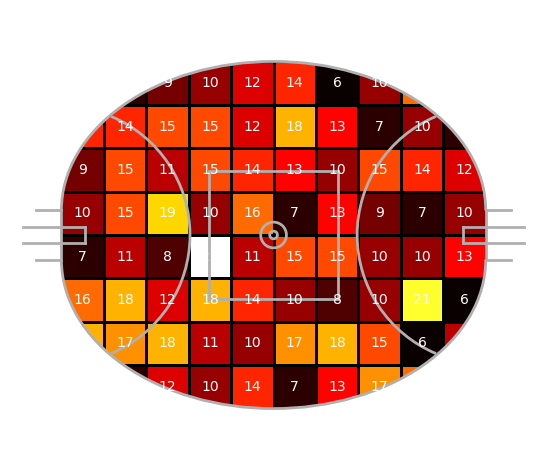

In [8]:
pitch = AFLPitch(pitch_width=135, pitch_length=165, line_zorder=2, pitch_colour='black')
fig, ax = pitch.draw()
x = np.random.uniform(low=-165/2, high=165/2, size=1000)
y= np.random.uniform(low=-135/2, high=135/2, size=1000)
stats = pitch.bin_statistic(x, y, bins = (10, 8))
pitch.heatmap(stats, edgecolors="black", cmap="hot", ax=ax)
stats['statistic'] = stats['statistic'].astype(int)
path_eff = [path_effects.Stroke(linewidth=0.5, foreground='#22312b')]
text = pitch.label_heatmap([stats], color='white', ax=ax, fontsize=10, ha='center', va='center')

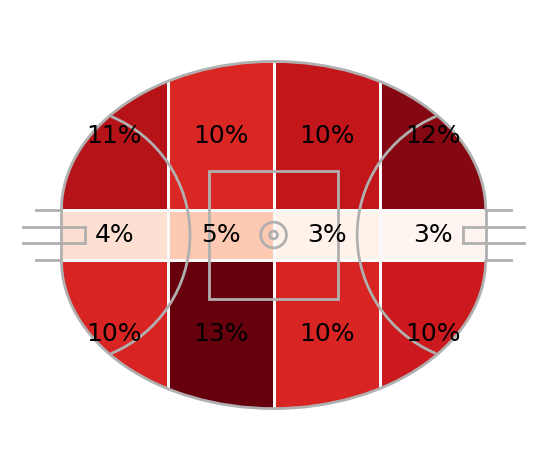

In [18]:
pitch = AFLPitch(pitch_width=135, pitch_length=165, line_zorder=2, pitch_colour='black')
fig, ax = pitch.draw()
x = np.random.uniform(low=-165/2, high=165/2, size=1000)
y= np.random.uniform(low=-135/2, high=135/2, size=1000)

bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=5)
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.behind_bottom, pitch.dim.behind_top, pitch.dim.top]))

bin_statistic = pitch.bin_statistic(x, y, statistic="count", bins = (bin_x, bin_y), normalize=True)
pitch.heatmap(bin_statistic, edgecolors="#f9f9f9", cmap="Reds", ax=ax)
labels = pitch.label_heatmap(bin_statistic, color="black", fontsize=18, ax=ax, ha="center", va="center", str_format='{:.0%}')